In [1]:
!pip install numpy pandas matplotlib seaborn sklearn keras tensorflow

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import tensorflow as tf
from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from sklearn.metrics import confusion_matrix
from tensorflow import keras

In [3]:
# Load the Data
df = pd.read_csv('bbc-text.csv')
df.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


In [4]:
# Data Preparation
df = df.dropna(how='any',axis=0) 

In [5]:
len(df)

2225

In [6]:
df['category'].value_counts()

sport            511
business         510
politics         417
tech             401
entertainment    386
Name: category, dtype: int64

<AxesSubplot:xlabel='category', ylabel='count'>

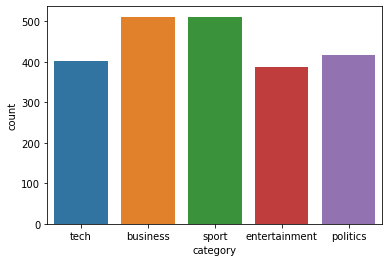

In [7]:
sns.countplot(x="category", data=df)

In [8]:
training_size = int(len(df) * .8)
print ("Train size: %d" % training_size)
print ("Test size: %d" % (len(df) - training_size))

layers = keras.layers
models = keras.models

Train size: 1780
Test size: 445


In [9]:
# Data Training
def split_and_get_testing_and_training_data(df, train_size):
    train = df[:train_size]
    test = df[train_size:]
    return train, test


In [10]:
training_data, testing_data = split_and_get_testing_and_training_data(df, training_size)

In [11]:
maximum_words = 1000
tokenizer = keras.preprocessing.text.Tokenizer(num_words=maximum_words, char_level=False)

In [12]:
tokenizer.fit_on_texts(training_data['text'])
x_train = tokenizer.texts_to_matrix(training_data['text'])
x_test = tokenizer.texts_to_matrix(testing_data['text'])

In [13]:
#Use sklearn utility to convert label strings to numbered index
encoder = LabelEncoder()
encoder.fit(training_data['category'])
y_train = encoder.transform(training_data['category'])
y_test = encoder.transform(testing_data['category'])

# Converts the labels to a one-hot representation
num_classes = np.max(y_train) + 1
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

x_train shape: (1780, 1000)
x_test shape: (445, 1000)
y_train shape: (1780, 5)
y_test shape: (445, 5)


In [14]:
# hyperparamaters Tuning
batch_size = 20
epochs = 10
drop_ratio = 0.5

# Build the model
model = models.Sequential()
model.add(layers.Dense(512, input_shape=(1000,)))
model.add(layers.Activation('relu'))
model.add(layers.Dense(num_classes))
model.add(layers.Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [15]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.1)

Epoch 1/10
81/81 [==============================] - 1s 8ms/step - loss: 0.3972 - accuracy: 0.8801 - val_loss: 0.1406 - val_accuracy: 0.9494
Epoch 2/10
81/81 [==============================] - 0s 6ms/step - loss: 0.0369 - accuracy: 0.9931 - val_loss: 0.1313 - val_accuracy: 0.9494
Epoch 3/10
81/81 [==============================] - 1s 6ms/step - loss: 0.0084 - accuracy: 1.0000 - val_loss: 0.1159 - val_accuracy: 0.9551
Epoch 4/10
81/81 [==============================] - 0s 6ms/step - loss: 0.0042 - accuracy: 1.0000 - val_loss: 0.1174 - val_accuracy: 0.9607
Epoch 5/10
81/81 [==============================] - 0s 6ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 0.1148 - val_accuracy: 0.9607
Epoch 6/10
81/81 [==============================] - 1s 6ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.1136 - val_accuracy: 0.9607
Epoch 7/10
81/81 [==============================] - 1s 7ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.1139 - val_accuracy: 0.9607
Epoch 8/10
81/81 [==

In [16]:
# Evaluate the accuracy of our trained model
evaluated_score = model.evaluate(x_test, y_test,
                       batch_size=batch_size, verbose=1)
print('Test loss:', evaluated_score[0])
print('Test accuracy:', evaluated_score[1])

23/23 [==============================] - 0s 2ms/step - loss: 0.1330 - accuracy: 0.9618
Test loss: 0.13298502564430237
Test accuracy: 0.9617977738380432


In [17]:
def analyse(batch_size, epochs, drop_ratio):
  print('batch size: {}, epochs: {}, drop_ratio: {}'.format(
      batch_size, epochs, drop_ratio))
  model = models.Sequential()
  model.add(layers.Dense(512, input_shape=(max_words,)))
  model.add(layers.Activation('relu'))
  model.add(layers.Dropout(drop_ratio))
  model.add(layers.Dense(num_classes))
  model.add(layers.Activation('softmax'))

  model.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])
  history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=0,
                    validation_split=0.1)
  score = model.evaluate(x_test, y_test,
                       batch_size=batch_size, verbose=0)
  print('\tTest loss:', score[0])
  print('\tTest accuracy:', score[1])

In [18]:
max_words = 1000
batch_size = 16
epochs = 4
drop_ratio = 0.4
analyse(batch_size, epochs, drop_ratio)

batch size: 16, epochs: 4, drop_ratio: 0.4
	Test loss: 0.1200539767742157
	Test accuracy: 0.9617977738380432


In [19]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

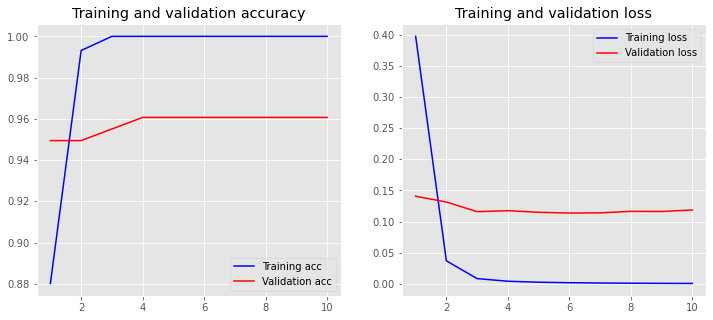

In [20]:
plot_history(history)

In [21]:
#prediction on individual examples
text_labels = encoder.classes_ 

for i in range(10):
    prediction = model.predict(np.array([x_test[i]]))
    predicted_label = text_labels[np.argmax(prediction)]
    print(testing_data['text'].iloc[i][:50], "...")
    print('Actual label:' + testing_data['category'].iloc[i])
    print("Predicted label: " + predicted_label + "\n") 

hobbit picture  four years away  lord of the rings ...
Actual label:entertainment
Predicted label: entertainment

game firm holds  cast  auditions video game firm b ...
Actual label:tech
Predicted label: tech

clarke plans migrant point scheme anyone planning  ...
Actual label:politics
Predicted label: politics

radcliffe will compete in london paula radcliffe w ...
Actual label:sport
Predicted label: sport

serena becomes world number two serena williams ha ...
Actual label:sport
Predicted label: sport

ultimate game  award for doom 3 sci-fi shooter doo ...
Actual label:tech
Predicted label: tech

algeria hit by further gas riots algeria suffered  ...
Actual label:business
Predicted label: business

fast lifts rise into record books two high-speed l ...
Actual label:tech
Predicted label: tech

muslim group attacks tv drama 24 a british muslim  ...
Actual label:entertainment
Predicted label: entertainment

us tv special for tsunami relief a us television n ...
Actual label:entertainmen

In [22]:
y_softmax = model.predict(x_test)

y_test_matrix = []
y_predicted_matrix = []

for i in range(len(y_test)):
    probs = y_test[i]
    index_arr = np.nonzero(probs)
    one_hot_index = index_arr[0].item(0)
    y_test_matrix.append(one_hot_index)

for i in range(0, len(y_softmax)):
    probs = y_softmax[i]
    predicted_index = np.argmax(probs)
    y_predicted_matrix.append(predicted_index)

In [23]:
#Plot_confusion Matrix

def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=30)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, fontsize=22)
    plt.yticks(tick_marks, classes, fontsize=22)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label', fontsize=25)
    plt.xlabel('Predicted label', fontsize=25)

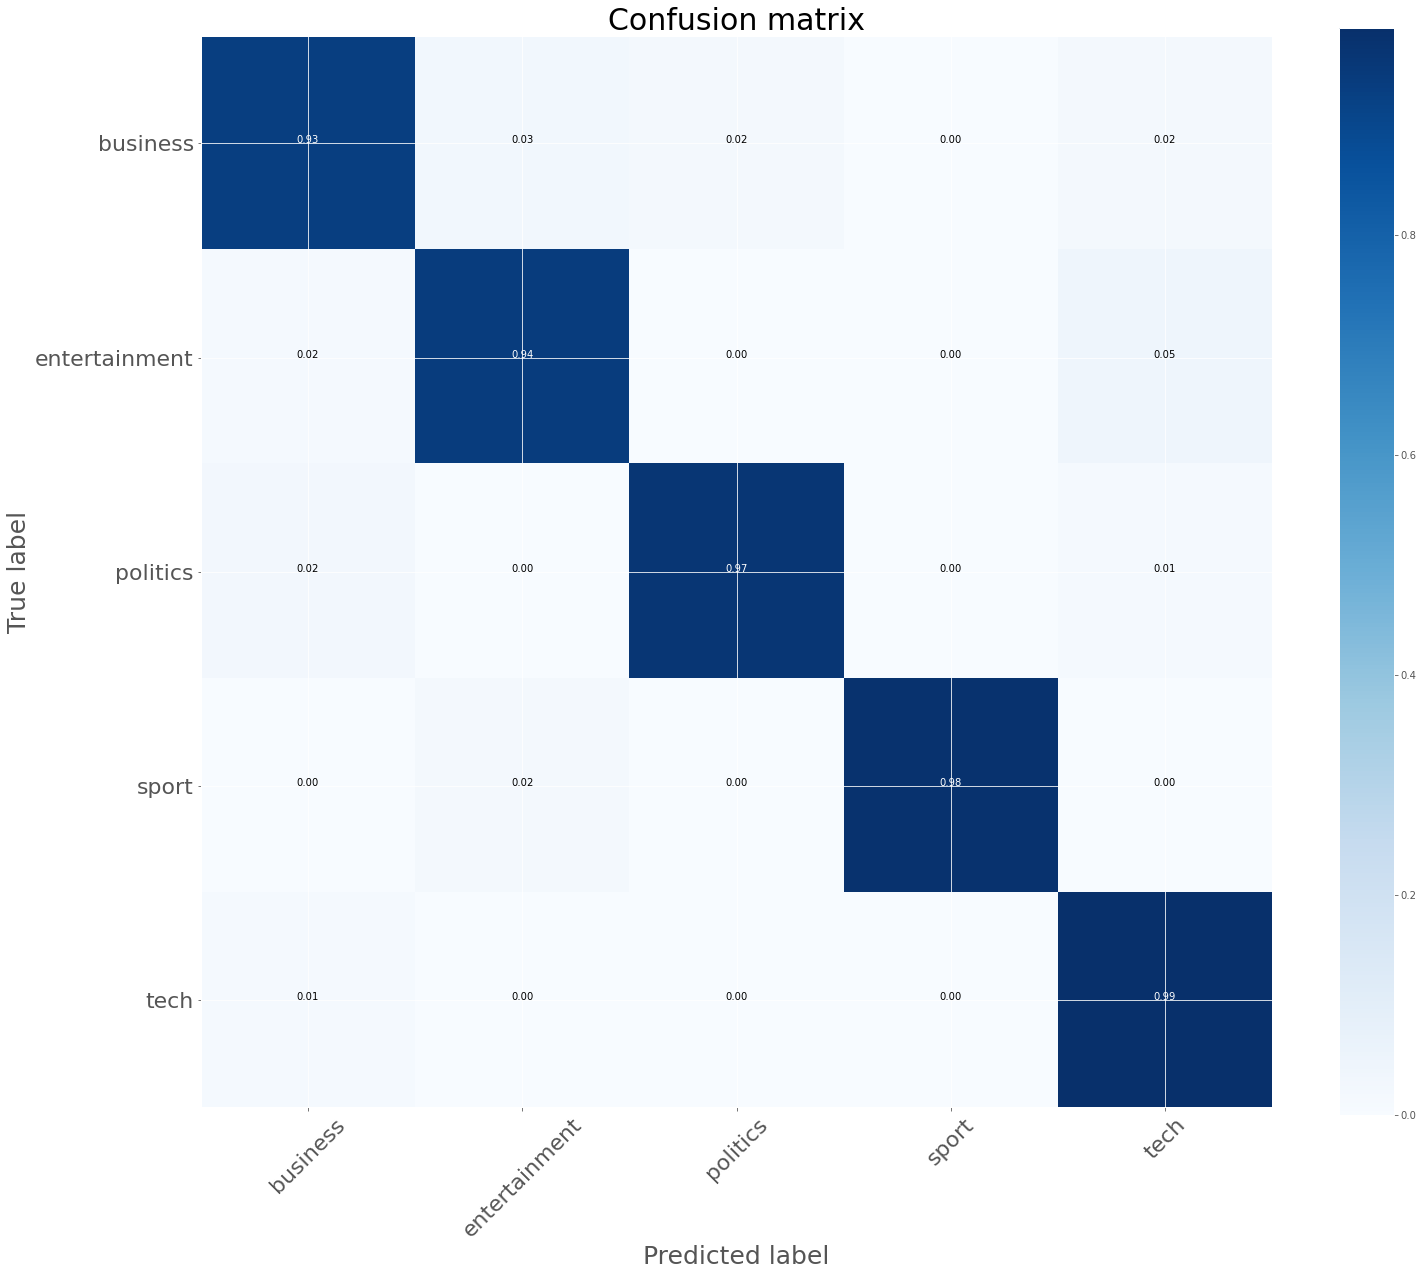

In [24]:
import itertools
cnf_matrix = confusion_matrix(y_test_matrix, y_predicted_matrix)
plt.figure(figsize=(24,20))
plot_confusion_matrix(cnf_matrix, classes=text_labels, title="Confusion matrix")
plt.show()